# AI-Tools: Graph search

1. Theme work
1. The search problem
1. Graph search, uninformed search strategies
  1. Breadth first 
  1. Depth First 
1. Data structures
  1. Stack
  1. Fifo 
1. Informed search and heuristic function
  1. A* algorithm

## Finding a way between towns

To actually solve the navigation problem, two things are needed:

1. Knowledge and
1. Algorithm

What knowledge is encoded in the map:
1. ?
1. ?
1. ?


![Kartta](figures/Kartta.png)

### Navigation algorithm for a human being

1. First indentify your current location on the map by browsing through all names in the map until you find a location where you currently are.
1. Then identify your target location on the map by browsing through all names in the map until you find a location where you are aiming at.
1. Follow the road starting from the source location which is leading closest to the direction of the the target location.
1. Drive forward
1. If you reach a crossing, choose the road which is best directed towards the target city.
1. Stop if you reach the target city, otherwise go back to stage 4

 - This algorithm is a greedy algorithm (informed search), since it uses additional information to select the best route in every step. 
 - It does not still guarantee that the whole solution is the best of all

Some real world complexities:
- Lots of small gravel roads
- private roads
- More information:
 - plan ahead better routes
 - more complex algorithms needed

It seems that the good implementation of the navigation is indeed dependent on the available knowledge, knowledge presentation and an algortithm.

### Navigation algorithm for a computer

#### Representing knowledge

Maps are useful to both computers and human beings, they just need to be presented in totally different form for computer. 

- knowledge stored in the memory
- memory is just a huge array of memory locations
- framework for organizing the data in the memory is necessary
- this kind of framework or ontology describing what data is stored in which location, what the data means and how it can be accesses, is called as a data structure.

The simplest data structure is a variable:

```x=2```

The command above tells computer to 
- reserve a location in a memory and call the memory location with a symbolic name ```x```
- store an integer 2 into it

When the data is needed in the future, the computer just reads the memory location which name is ```x``` to be able to use the value, and it can also write a new value to the same location.

A slightly more complex data structure would be the list of names of the locations:

```
  towns = ['Vaasa', 'Seinäjoki', 'Vimpeli', 'Ylistaro', 'Lapua']
```

This time, the computer reserves memory for three strings, and calls the memory location with a same ```towns```. The name of the second town in the list of towns can be easily read or written.

A road between towns can be stored as a triplet of (source town, destination town, and a distance), for example:

```('Vaasa', 'Laihia', 26)```

It would mean that there is a road between Vaasa to Laihia, and obviously from Laihia to Vaasa, and it's lenght is 26 km.

These city-city-distance tuples could be stored in a list to describe the whole map.

This data structure would not be very efficient, since it would require searching through the full list of towns for every branch in every crossroads.

A map can be more efficiently described as a graph:

![Simplegraph](figures/mapgraph.svg)

In the graph above, the nodes (vertices) are the towns or municipalities, and the edges are the main roads connecting the towns together. The weights on the edges describes the distances between the towns.

The graph above describes both the topology and the quantitative data needed for a computer for searching the route. 

What would be a good algorithm to search the map above? 
 - Breadth first search?
 - Depth first search?

```{admonition} Question?
In which order breadth first and depth first searches would list the paths. Which one would probably find a better path, or is there any difference?
```

```{admonition} Question?
What would be obstacles for both methods, and how they could be overcome?
```

```{admonition} Question?
What would be appropriate heuristic function in the A* search, and how does that help?
```

#### How to encode this graph for a computer?

In [1]:
# A template for all nodes (actually a class)
class Node:
    name=''
    neighbors=[]
    
    def __init__(self, name):
        self.name=name
        

In [2]:
# Implement all nodes based on the Node class (template)
# The instances of the template are called as objects
vaasa=Node('Vaasa')
laihia=Node('Laihia')
voyri=Node('Vöyri')
ilmajoki=Node('Ilmajoki')
ylistaro=Node('Ylistaro')
seinajoki=Node('Seinäjoki')
voyri=Node('Vöyri')
lapua=Node('Lapua')
jepua=Node('Jepua')
alajarvi=Node('Alajarvi')
kyyjarvi=Node('Kyyjarvi')
kuortane=Node('Kuortane')
kauhava=Node('Kauhava')
lappajarvi=Node('Lappajärvi')
evijarvi=Node('Evijärvi') 
vimpeli=Node('Vimpeli')

print(vaasa.name)
print(vaasa.neighbors)

Vaasa
[]


In [3]:
# Then the implementation of the connection between the towns (edges)
vaasa.neighbors=[(voyri, 32), (laihia, 26)]
laihia.neighbors=[(ilmajoki, 45), (ylistaro,29)]
voyri.neighbors=[(jepua, 42),(kauhava, 56)]
ilmajoki.neighbors=[(seinajoki, 18)]
ylistaro.neighbors=[(seinajoki,27), (lapua, 28)]
seinajoki.neighbors=[(lapua, 26)]
voyri.neighbors=[(kauhava, 45),(jepua, 42)]
lapua.neighbors=[(kauhava, 18), (alajarvi, 46)]
jepua.neighbors=[(kauhava, 56)]
alajarvi.neighbors=[(kyyjarvi, 36), (vimpeli, 22), (kuortane, 40)]
kyyjarvi.neighbors=[]
kuortane.neighbors=[]
kauhava.neighbors=[(lappajarvi, 38), (evijarvi, 44)]
lappajarvi.neighbors=[(vimpeli, 23)]
evijarvi.neighbors=[(vimpeli, 32)]
vimpeli.neighbors=[]

node, distance = vaasa.neighbors[1]
print(node.name)
print(distance) 

Laihia
26


In [4]:
# Now we can list the beginning of the graph
start=vaasa
print("Starting the search from", start.name)
print("The neighbors are")
for neighbor, distance in start.neighbors:
    print("\t-", neighbor.name, "\t:", distance, "km")
    
for i in [7,5,4,7]:
    print(i)
print('hello')

Starting the search from Vaasa
The neighbors are
	- Vöyri 	: 32 km
	- Laihia 	: 26 km
7
5
4
7
hello


#### How to search the path

Both depth first and bredth first algorithms are possible. In depth first search, it is easier to keep the current search path in the memory. In breadth first search, all parallel paths needs to be kept in memory at the same time, which requires more complex data structure and more memory. 

#### The data structures for search

For the following implementation, stack (LIFO) and FIFO data-structures are needed. They are shown in the following Figure. In python, a normal list can be used as FIFO or Stack data structure. In both cases new entries are inserted in the end of the list, using `append()` or `push()` -functions. When the list is used as a stack, the sample inserted last, is popped out, using `pop()` command, and when the list is used as LIFO, the first value in the list is popped out with `pop(0)` -function call.

![FIFO and LIFO](figures/FIFOandLIFO.svg)

#### Depth first

Start from the starting node, and repeat following phases until target is found:

 - If there is still unvisited neighbour cities left:
   - take first unvisited neighbour and add it into the stack of cities along current path
   - Enter into that neighbour and continue
 - If there is no more unvisited neighbour cities under current path
   - remove the latest city from the stack 
   - come backwards to the previous city and continue

The stack describing the current path could look as follows in an example search case

1. Vaasa -> Laihia 
2. Vaasa -> Laihia -> Ylistaro 
3. Vaasa -> Laihia -> Ylistaro -> Lapua 
4. Vaasa -> Laihia -> Ylistaro -> Lapua -> Alajärvi 
5. Vaasa -> Laihia -> Ylistaro -> Lapua -> Alajärvi -> Kyyjärvi (*no neighbors, go back*)
6. Vaasa -> Laihia -> Ylistaro -> Lapua -> Alajärvi -> Kuortane (*no neighbors, go back*)
7. Vaasa -> Laihia -> Ylistaro -> Lapua -> Alajärvi -> Vimpeli (*Target found path is in the stack*)

In [5]:

# Stack of town within the path
path_stack = []

# Queue of unhandled towns, and the depth, and distance
stack = [(vaasa, 1, 0)]

# Current depth
depth=0

# Repeat until we have more town to visit
while len(stack)>0:
    # Take new node and it's depth from the queue
    current_node, new_depth, d = stack.pop()
    
    # If the current_node is deeper than previous, insert the new node in the stack
    # Insert also the distance from the previous node
    if new_depth>depth:
        path_stack.append((current_node, d))
    else:
        # If the solution was not found, and the algorithms is coming back
        # then the previous entries needs to be popped out from stack,
        # and the current node inserted instead
        for i in range(depth-new_depth+1):
            path_stack.pop()
        path_stack.append((current_node,d))
        
    # update the current depth
    depth=new_depth
    
    # Check is the solution was found, if it was, break the loop
    if current_node==vimpeli:
        break
        
    # Othervise, add the neighbours of the current node to the stack of nodes
    # yet to be processed. Use depth one deeper than current node
    # The distance from the current node is also appended
    for neighbor, distance in current_node.neighbors:
        stack.append((neighbor, depth+1, distance))
 
# Print the result
distance=0
for node,d  in path_stack:
    distance=distance+d
    print("%10s : %4d km" % (node.name, distance))

     Vaasa :    0 km
    Laihia :   26 km
  Ylistaro :   55 km
     Lapua :   83 km
  Alajarvi :  129 km
   Vimpeli :  151 km


```{admonition} Question?
Is this an optimal solution? How to find other solutions?
```

#### Recursive solution

Recursive functions suit naturally for graph search, because the problem is inherently recursive. They are not very often used, however, because they require more memory than loop-algorithms due to recursive function calls. Some programming languages, especially from LISP-family have special implementation for tail-recursion, and in those languages recursion is more often used.

The idea of recursive solution is very simple. Since the problem for finding a route from Vaasa to Vimpeli is non-trivial, try to go to the next town closer to Vimpeli, such as Laihia, and try to find the route to Vimpeli from there. Since that is also non-trivial, go from Laihia to the next town, like Ilmajoki, and try to find route from there. Repeat until you are in Vimpeli, and then the solution is trivial. During the descend, all steps are stored in the stack and therefore the the path is now found. If the algorithm ends up into a dead end, then it backtracks one step back, and removes the latest failed step from the stack of current path.

Here is a recursive solution, which finds a route from Vaasa to Vimpeli. Because it always takes the last added town from the stack, it is a depth first approach. It can be easily modified to find all possible paths.

In [25]:
# Define a helper function for plotting 
def print_path_and_distance(q):
    distance=0
    print("  Queue: [", end='')
    for node,d in q:
        print(node.name, end=', '),
        distance+=d
    print("] = ", distance, end='\n')

# Read the last value of the stack, but do not remove it (from stack overflow)
def peek_stack(stack):
    if stack:
        return stack[-1]

In [83]:
# Actual recursive search
def RecursiveDFS(stack):
    # Read the last value of the stack, but do not take it away
    current_node, distance=peek_stack(stack)
    if current_node==vimpeli:
        return stack
    for neighbor, distance in current_node.neighbors:
        stack.append((neighbor, distance))
        retval = RecursiveDFS(stack)
        if retval!=False:
            # This return breaks the search. If this is removed 
            # it continues to remove all possible path
            return retval
    return False

# Start the search and print the results
path=RecursiveDFS([(vaasa,0)])
print_path_and_distance(path)

  Queue: [Vaasa, Vöyri, Kauhava, Lappajärvi, Vimpeli, ] =  138


#### Recursive breadth first solution
The core is otherwise the same as Depth first, but now the latest solution is taken from the bottom of the queue (FIFO). Therefore it expands nodes bredth first manner. 

This implementation does not keep track fo the current paths stack, and it does not yet find the actual path. But this feature can be added to the implementation. The current implementation visits all towns and lists them in Breadth first search order.

In [39]:
##The implementation of the breadth first search (BFS) is now simply the following

def print_queue(q):
    print("  Queue: [", end='')
    for node in q:
        print(node.name, end=', '),
    print("]", end='\n')

In [46]:
def bfsearch(start_node):
    queue = [start_node]
    explored = []
     
    # Repeat untill queue becomes empty
    while queue:
        print_queue(queue)
        current_node=queue.pop(0)
        if current_node not in explored:
            explored.append(current_node)
            for neighbor, distance in current_node.neighbors:
                queue.append(neighbor)
    return explored

In [84]:
path=bfsearch(vaasa)
print_queue(path)

  Queue: [Vaasa, ]
  Queue: [Vöyri, Laihia, ]
  Queue: [Laihia, Kauhava, Jepua, ]
  Queue: [Kauhava, Jepua, Ilmajoki, Ylistaro, ]
  Queue: [Jepua, Ilmajoki, Ylistaro, Lappajärvi, Evijärvi, ]
  Queue: [Ilmajoki, Ylistaro, Lappajärvi, Evijärvi, Kauhava, ]
  Queue: [Ylistaro, Lappajärvi, Evijärvi, Kauhava, Seinäjoki, ]
  Queue: [Lappajärvi, Evijärvi, Kauhava, Seinäjoki, Seinäjoki, Lapua, ]
  Queue: [Evijärvi, Kauhava, Seinäjoki, Seinäjoki, Lapua, Vimpeli, ]
  Queue: [Kauhava, Seinäjoki, Seinäjoki, Lapua, Vimpeli, Vimpeli, ]
  Queue: [Seinäjoki, Seinäjoki, Lapua, Vimpeli, Vimpeli, ]
  Queue: [Seinäjoki, Lapua, Vimpeli, Vimpeli, Lapua, ]
  Queue: [Lapua, Vimpeli, Vimpeli, Lapua, ]
  Queue: [Vimpeli, Vimpeli, Lapua, Kauhava, Alajarvi, ]
FOUND
  Queue: [Vaasa, Vöyri, Laihia, Kauhava, Jepua, Ilmajoki, Ylistaro, Lappajärvi, Evijärvi, Seinäjoki, Lapua, ]


## Puzzle solving, infinite graph

- The possible moves in the 8-puzzle game forms a graph
- Obviously, if the tree is expanded from all possible moves, the goal state will be included in the tree.
- The goal can be find using graph search algorithms, such as A*.

<!-- ![EightPuzzleGraph](figures/8puzzle-tree.svg) -->

<img src="figures/8puzzle-tree.svg" width="600" alt="Eight puzzle">

 - Even though this 8-puzzle is small but the number of possible moves will grow exponentially
 - The solution graph is infinite 
 - Most of the branches are, however, bad moves
 - It is a good strategy to use a heuristic function to eliminate bad moves before taking them.
 - To explore an infinite graph, one must expand it on-the-go

In this example an implementation included in the course book is used:
   
> Python code for the book *[Artificial Intelligence: A Modern Approach](http://aima.cs.berkeley.edu).* You can use this in conjunction with a course on AI, or for study on your own. We're looking for [solid contributors](https://github.com/aimacode/aima-python/blob/master/CONTRIBUTING.md) to help.

### Solution using Networkx graph library

The previous implementations have shown approaches for implementing graph searching. But there are also many libraries with ready made implementations of various graph search algorithms. [Networkx](https://networkx.org/) is one of the most often used graph libraries in Python.

I have collected some additional information about the towns between Vaasa and Vimpeli, for example the coordinates of the towns, which can be used for calculating the direct line distances between them to define a heuristic function for guiding the graph search for most promising directions. 

      Name      Northing      Easting
    0 Akaa      61.167145977  23.865888764
    1 Alajärvi  63.001273254  23.817522812
    2 Alavieska 64.166646246  24.307213479
    3 Alavus    62.586161997  23.616600589
    4 Asikkala  61.172512361  25.549142484
    5 Askola    60.530210718  25.598880612
    ...


The following function calculates the coordinates of the towns based on their longitudes and latitudes.

In [1]:
# This code calculates the coordinates of the towns. It is only needed for nice plotting

import pandas as pd
from math import sin, pi

Coordinates=pd.read_csv('data/coordinates.csv')
def getCoordinates(Location, Theta=63.092589):
    Ps=Coordinates[Coordinates.Name==Location]
    if len(Ps)==0:
        print("Now location %s found!" % Location)
        return None
    P=Ps.iloc[0]
    # Earth radius / km
    R=6371.0    # Average
    Rp=6356.8   # Polar
    Re=6378.1   # Equatorial
    #
    # Earth radius in current Northing
    #Theta=P.Northing/180*pi
    #Theta=63.092589
    r=sin(pi/2-Theta/180*pi)*Re
    #
    y = (P.Northing/180*pi)*Rp
    x = (P.Easting/180*pi)*r
    return (x,y)

print(getCoordinates('Vaasa'))
print(getCoordinates('Seinäjoki'))

(1088.9504471170537, 6999.93912935637)
(1150.7335047599795, 6965.997532375281)


#### Encoding the information

The biggest work when using the  Networkx all other similar libraries, is to encode the information for the library. In the code below, the libraries are first imported into the workspace, and empty graph is created. 

Then the nodes are added from the list of towns using for-loop. The coordinates of the towns are added in each node (the pos attribute) to be able to plot the graph in actual scale.

The roads between the towns are added as edges. The lengths of the roads are added as weigths of edges. 

The networx library includes convenient funtions for plotting the graph. The weights of the edges can be plotted in the edges and the pos-attribute is now used to place the towns in a coordinate system.

In [6]:
# This code generates the graph

import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
M=nx.DiGraph()

# List of towns added as nodes
Towns=['Vaasa', 'Laihia', 'Vöyri', 'Ilmajoki', 'Ylistaro', 'Seinäjoki',
    'Vöyri', 'Lapua', 'Jepua', 'Alajärvi', 'Kyyjärvi', 'Kuortane',
    'Kauhava', 'Lappajärvi', 'Evijärvi', 'Vimpeli']

# Add the nodes and store the coordinates of the towns as well, for nice plotting
for town in Towns:
    M.add_node(town, pos=getCoordinates(town))

In [ ]:
# Add the edges, and their weights = distances 
M.add_edge('Vaasa', 'Laihia', weight=26)
M.add_edge('Vaasa', 'Vöyri', weight=32)
M.add_edge('Laihia', 'Ilmajoki', weight=45)
M.add_edge('Laihia', 'Ylistaro', weight=29)
M.add_edge('Vöyri', 'Jepua', weight=42)
M.add_edge('Vöyri', 'Kauhava', weight=56)
M.add_edge('Ilmajoki', 'Seinäjoki', weight=18)
M.add_edge('Ylistaro', 'Seinäjoki', weight=27)
M.add_edge('Ylistaro', 'Lapua', weight=28)
M.add_edge('Seinäjoki', 'Lapua', weight=26)
M.add_edge('Vöyri', 'Kauhava', weight=45)
M.add_edge('Vöyri', 'Jepua', weight=42)
M.add_edge('Lapua', 'Kauhava', weight=18)
M.add_edge('Lapua', 'Alajärvi', weight=46)
M.add_edge('Jepua', 'Kauhava', weight=56)
M.add_edge('Alajärvi', 'Kyyjärvi', weight=36)
M.add_edge('Alajärvi', 'Vimpeli', weight=22)
M.add_edge('Alajärvi', 'Kuortane', weight=40)
M.add_edge('Kauhava', 'Lappajärvi', weight=38)
M.add_edge('Kauhava', 'Evijärvi', weight=44)
M.add_edge('Lappajärvi', 'Vimpeli', weight=23)
M.add_edge('Evijärvi', 'Vimpeli', weight=32)

Graph is ready


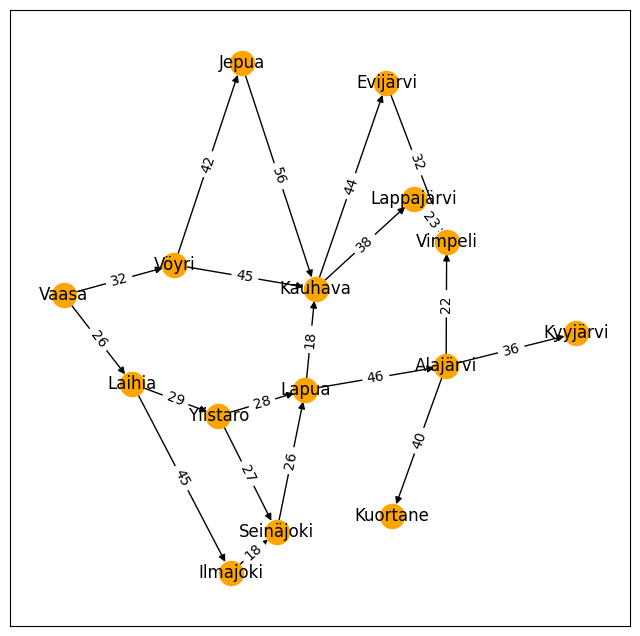

In [7]:
# Plot the graph nicely in scale
fig=plt.figure(figsize=(8,8))
pos=nx.get_node_attributes(M,'pos') 
nx.draw_networkx  (M, pos=pos, node_color='orange')
labels = nx.get_edge_attributes(M,'weight')
nx.draw_networkx_edge_labels(M,pos,edge_labels=labels)

print("Graph is ready")

####  Asking questions from the graph

In [7]:
list(M.neighbors('Kauhava'))

['Lappajärvi', 'Evijärvi']

In [52]:
#nx.depth_first_search.dfs_successors(M,'Vaasa')
for node in nx.breadth_first_search.bfs_successors(M, 'Vaasa'):
    print(node)

('Vaasa', ['Laihia', 'Vöyri'])
('Laihia', ['Ilmajoki', 'Ylistaro'])
('Vöyri', ['Jepua', 'Kauhava'])
('Ilmajoki', ['Seinäjoki'])
('Ylistaro', ['Lapua'])
('Kauhava', ['Lappajärvi', 'Evijärvi'])
('Lapua', ['Alajärvi'])
('Lappajärvi', ['Vimpeli'])
('Alajärvi', ['Kyyjärvi', 'Kuortane'])


The breadth first ordering of the towns can be used to find a path from Vaasa to Vimpeli, by starting from Vimpeli to the parent Lappajärvi, and so on the reverse order up to Vaasa.

    Vaasa -> Vöyri -> Kauhava -> Lappajärvi -> Vimpeli
    
The path is unique in this ordering but not necessary optimal, since the weights are not taken into account.

#### A* algorithm

More optimal path minimizing the weights can be found using A* algorithm. If no heuristic function is given, the algorith is using [Dijkstra's algorithm](https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/). It finds an optimal path, but it may be slow for very large graphs, because Dijkstra's algorith is uninformed search algorithm.

In [53]:
print("Shortest path     :",  nx.astar_path(M, 'Vaasa', 'Vimpeli'))
print("Shortest path     :",  nx.astar_path(M, 'Vaasa', 'Vimpeli'))
print("Shortest distance :", nx.astar_path_length(M, 'Vaasa', 'Vimpeli'), "km")


Shortest path     : ['Vaasa', 'Vöyri', 'Kauhava', 'Lappajärvi', 'Vimpeli']
Shortest path     : ['Vaasa', 'Vöyri', 'Kauhava', 'Lappajärvi', 'Vimpeli']
Shortest distance : 138 km


The A* algorith is informed search, which is made for efficient using so called heuristic function. In case of navigation, the natural heuristic function is to calculate the line sight distance remaining to the target, and use that to judge the fitness of different options for the next step. This distance can be easily calculated, since the coordinates of the towns is known.

The heuristic function needed by A* method takes two nodes as a parameter and returns the line of sight distance between them. For example, when the algorithm needs to choose should it go either Laihia or Vöyri from Vaasa, the decision is made by adding the distance to the next time and the line of sight distance from that town to Vimpeli, and the decision with smallest costs is selected.

In [54]:
from math import sqrt
from numpy import random

def distanceByName(A,B):
    a=getCoordinates(A)
    if a==None:
        return None
    b=getCoordinates(B)
    if b==None:
        return None
    #print(a,b)
    return sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2 )
    
def heuristic(u, v):
    return distanceByName(u,v)

# Test the method in the first step
print("Estimated costs through Vöyri is  ", 32 + heuristic('Vöyri', 'Vimpeli'))
print("Estimated costs through Laihia is ", 26 + heuristic('Laihia', 'Vimpeli'))

Estimated costs through Vöyri is   111.06838998333184
Estimated costs through Laihia is  119.41142572684615


Path through Vöyri seems shorter, so that is selected as the first step.

In [55]:
random.seed(0)
%timeit path = nx.astar_path(M, 'Vaasa', 'Vimpeli', heuristic=heuristic, weight='weight')
print("Shortest path     :",  nx.astar_path(M, 'Vaasa', 'Vimpeli', heuristic=heuristic, weight='weight'), )
random.seed(0)
print("Shortest distance :", nx.astar_path_length(M, 'Vaasa', 'Vimpeli', heuristic=heuristic, weight='weight'), "km")

8.54 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Shortest path     : ['Vaasa', 'Vöyri', 'Kauhava', 'Lappajärvi', 'Vimpeli']
Shortest distance : 138 km


The path found is probably optimal, since the A* algorith search multiple paths from source to destination to find the true costs. The algorith uses the heuristic function to make the search faster but due to search of multiple paths, the quality of the heuristic function is not crucial. The algorithm also keeps track of the true costs already calculated, and therefore it does not need to calculate the true costs of a certain path twice.

#### More complex example

See below an example of the search in one magnitude more complex graph, and the nice visualization capabilities of the networkx library.

CPU times: user 608 ms, sys: 0 ns, total: 608 ms
Wall time: 618 ms


(-0.10495984359313248,
 1.1046983766461582,
 -0.10492172272077263,
 1.1043912185895537)

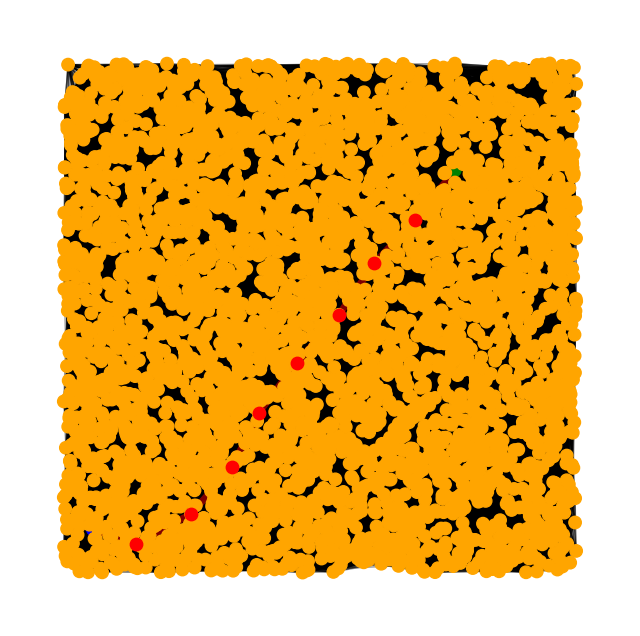

In [9]:
N=4000
G = nx.random_geometric_graph(N, 0.125, seed=2)
pos = nx.get_node_attributes(G, "pos")

nodelist = G.nodes(data=True)
A=1
B=20
colors=['orange']*N
colors[A]='blue'
colors[B]='green'

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=G.nodes,
    node_size=80,
    node_color=colors,
)

%time path=nx.astar_path(G,A,B)
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=5, alpha=0.5)
nx.draw_networkx_nodes(G,pos,nodelist=path[1:-1],node_size=80, node_color='r', alpha=1.0)

plt.axis("off")

In [57]:
%timeit path=nx.astar_path(G,A,B)
print("Shortest path     :",  path )
print("Shortest distance :", nx.astar_path_length(G,A,B), "steps")

3.25 ms ± 175 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Shortest path     : [1, 88, 292, 38, 283, 307, 24, 363, 324, 174, 20]
Shortest distance : 10 steps


## Intelligent navigation agent

The intelligent navigation agent can perceive it's current location using GPS or other Global Navigation Satellite System (GNSS) and the target location is included in the state, set by the user. The map, in the form of a graph, shown above, is the data model and knowledge database for an agent. 

 - An agent making uninformed search and selecting the first path found is a goal based agent. It can find a route to the target, but does not optimize utility
 - An agent using weights and A* finds an optimal path, trying to maximize the utility. This kind of agent would be a utility based agent.
 - Some navigation systems monitor the true time taken for drivers on different paths, and they can update the weights based on their observations. Google navigator, for example, can observe traffic jams, and optimize the routes based on the real time traffic information. These kinds of agents are called as learning navigation agents.
 
The strategies shown above can be utilized also for many other purposes, such as solving the 8-puzzle or playing chess. All possible moves taken in each turn spans a graph, which can become very large,  in which case, the whole graph of all possible solutions cannot be pre-stored in the memory, but expanded step by step as necessary, guided by the heuristic function. 

## Summary

In this module the methods for searching data and paths from graph and using graph library has been covered. 
The learning outcomes of the module:

  - How the data is encoded as data structures in programs
  - Some implementation strategies for breadth first, depth first and A* searches
  - Implementation strategy of a heuristic function
  - Overall view of the services provided by the Networkx library and the possibilities it provides
  - Some understanding of Python programing
  - How to use graph search as part of and intelligent agent, also in cases where the full graph is not known *a-priori*.